## 데이터 결합

### 데이터 불러오기

In [1]:
attendance = pd.read_csv("datas/attendance.csv")  # 일별 관중수
enviroment = pd.read_csv("datas/enviroment_jamsil.csv")  # 날씨, 기후, 미세먼지
kbo = pd.read_csv("datas/kbo_master.csv")  # 경기 결과
mpark = pd.read_csv("datas/mpark_pivot.csv")  # 엠팍 1
naver = pd.read_csv("datas/naver_search.csv")

In [2]:
attendance = attendance.drop(["홈", "방문", "구장", "요일"], axis=1)
attendance = attendance.rename({"날짜":"date", "관중수":"attendance"}, axis="columns")

### kbo + mpark

In [3]:
dusan = kbo[kbo["home"] == "두산"]
dusan = dusan.merge(mpark, how="left", left_on="date", right_on="date")
dusan = dusan.drop(["LG_rate"], axis=1)
dusan = dusan.rename({"두산_rate":"m_rate"}, axis="columns")

In [4]:
lg = kbo[kbo["home"] == "LG"]
lg = lg.merge(mpark, how="left", left_on="date", right_on="date")
lg = lg.drop(["두산_rate"], axis=1)
lg = lg.rename({"LG_rate":"m_rate"}, axis="columns")

In [5]:
kbo = pd.concat([dusan, lg]).reset_index(drop=True)

In [6]:
kbo

,date,home,home-away,win_shift,rank_shift,cumsum_win,streak,m_count,m_rate
0,2017/03/31,두산,5.0,0,0.0,0,1,1038,0.055877
1,2017/04/01,두산,0.0,1,1.0,1,-1,2001,0.077461
2,2017/04/02,두산,3.0,0,4.0,1,1,1864,0.118562
3,2017/04/07,두산,5.0,1,3.0,2,-1,1838,0.043526
4,2017/04/08,두산,5.0,0,5.0,2,-2,2090,0.094737
...,...,...,...,...,...,...,...,...,...
426,2019/09/23,LG,5.0,1,4.0,40,-1,391,0.491049
427,2019/09/24,LG,4.0,0,4.0,40,-2,1242,0.186795
428,2019/09/27,LG,1.0,0,4.0,40,-3,695,0.283453
429,2019/09/29,LG,3.0,0,4.0,40,-4,970,0.365979


In [7]:
naver.head(5)

,date,search,team
0,2017/03/01,0.39975,두산
1,2017/03/02,0.46286,두산
2,2017/03/03,0.35224,두산
3,2017/03/04,0.32799,두산
4,2017/03/05,0.33325,두산


### kbo(m) + search

In [8]:
dusan_1 = kbo[kbo["home"] == "두산"]
dusan_2 = naver[naver["team"] == "두산"]
kbo_dusan = dusan_1.merge(dusan_2, how="left", left_on="date", right_on="date")

In [9]:
kbo_dusan

,date,home,home-away,win_shift,rank_shift,cumsum_win,streak,m_count,m_rate,search,team
0,2017/03/31,두산,5.0,0,0.0,0,1,1038,0.055877,2.20051,두산
1,2017/04/01,두산,0.0,1,1.0,1,-1,2001,0.077461,5.29584,두산
2,2017/04/02,두산,3.0,0,4.0,1,1,1864,0.118562,6.05390,두산
3,2017/04/07,두산,5.0,1,3.0,2,-1,1838,0.043526,1.99199,두산
4,2017/04/08,두산,5.0,0,5.0,2,-2,2090,0.094737,2.92596,두산
...,...,...,...,...,...,...,...,...,...,...,...
210,2019/09/16,두산,1.0,1,2.0,43,-1,667,0.122939,1.43957,두산
211,2019/09/20,두산,5.0,0,3.0,43,1,613,0.161501,1.87143,두산
212,2019/09/21,두산,5.0,1,2.0,44,2,323,0.291022,1.96436,두산
213,2019/09/22,두산,2.0,1,2.0,45,-1,1046,0.261950,2.17208,두산


In [10]:
lg_1 = kbo[kbo["home"] == "LG"]
lg_2 = naver[naver["team"] == "LG"]
kbo_lg = lg_1.merge(lg_2, how="left", left_on="date", right_on="date")

In [11]:
kbo = pd.concat([kbo_dusan, kbo_lg])

In [12]:
kbo = kbo.drop(["team"], axis=1)

In [15]:
kbo = kbo.sort_values("date")

In [16]:
# 날씨, 기후, 미세먼지와 관중수 결합
df = attendance.merge(enviroment, how="inner", left_on="date", right_on="date")
df = df.merge(kbo, how="inner", left_on="date", right_on="date")

In [17]:
df

,date,attendance,weekday,weekend,rainy,mean_c,O3,PM10,PM25,home,home-away,win_shift,rank_shift,cumsum_win,streak,m_count,m_rate,search
0,2017/03/31,"21,121",Friday,0.0,1.0,8.5,0.021,47.0,27.0,두산,5.0,0,0.0,0,1,1038,0.055877,2.20051
1,2017/04/01,"20,636",Saturday,1.0,1.0,10.0,0.033,22.0,14.0,두산,0.0,1,1.0,1,-1,2001,0.077461,5.29584
2,2017/04/02,"22,457",Sunday,1.0,0.0,9.5,0.037,50.0,30.0,두산,3.0,0,4.0,1,1,1864,0.118562,6.05390
3,2017/04/04,"16,411",Tuesday,0.0,0.0,14.5,0.033,78.0,37.0,LG,6.0,0,0.0,0,1,1297,0.205860,63.69426
4,2017/04/06,"12,166",Thursday,0.0,1.0,10.5,0.028,26.0,15.0,LG,7.0,1,1.0,1,2,1369,0.199416,63.05732
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2019/09/24,"15,115",Tuesday,0.0,0.0,20.5,0.016,24.0,12.0,LG,4.0,0,4.0,40,-2,1242,0.186795,16.56050
428,2019/09/27,"19,523",Friday,0.0,0.0,23.5,0.011,23.0,11.0,LG,1.0,0,4.0,40,-3,695,0.283453,29.29936
429,2019/09/29,"25,000",Sunday,1.0,0.0,23.5,0.031,34.0,23.0,LG,3.0,0,4.0,40,-4,970,0.365979,26.75159
430,2019/09/30,"12,042",Monday,0.0,0.0,23.0,0.032,46.0,33.0,LG,6.0,0,4.0,40,1,818,0.238386,36.30573


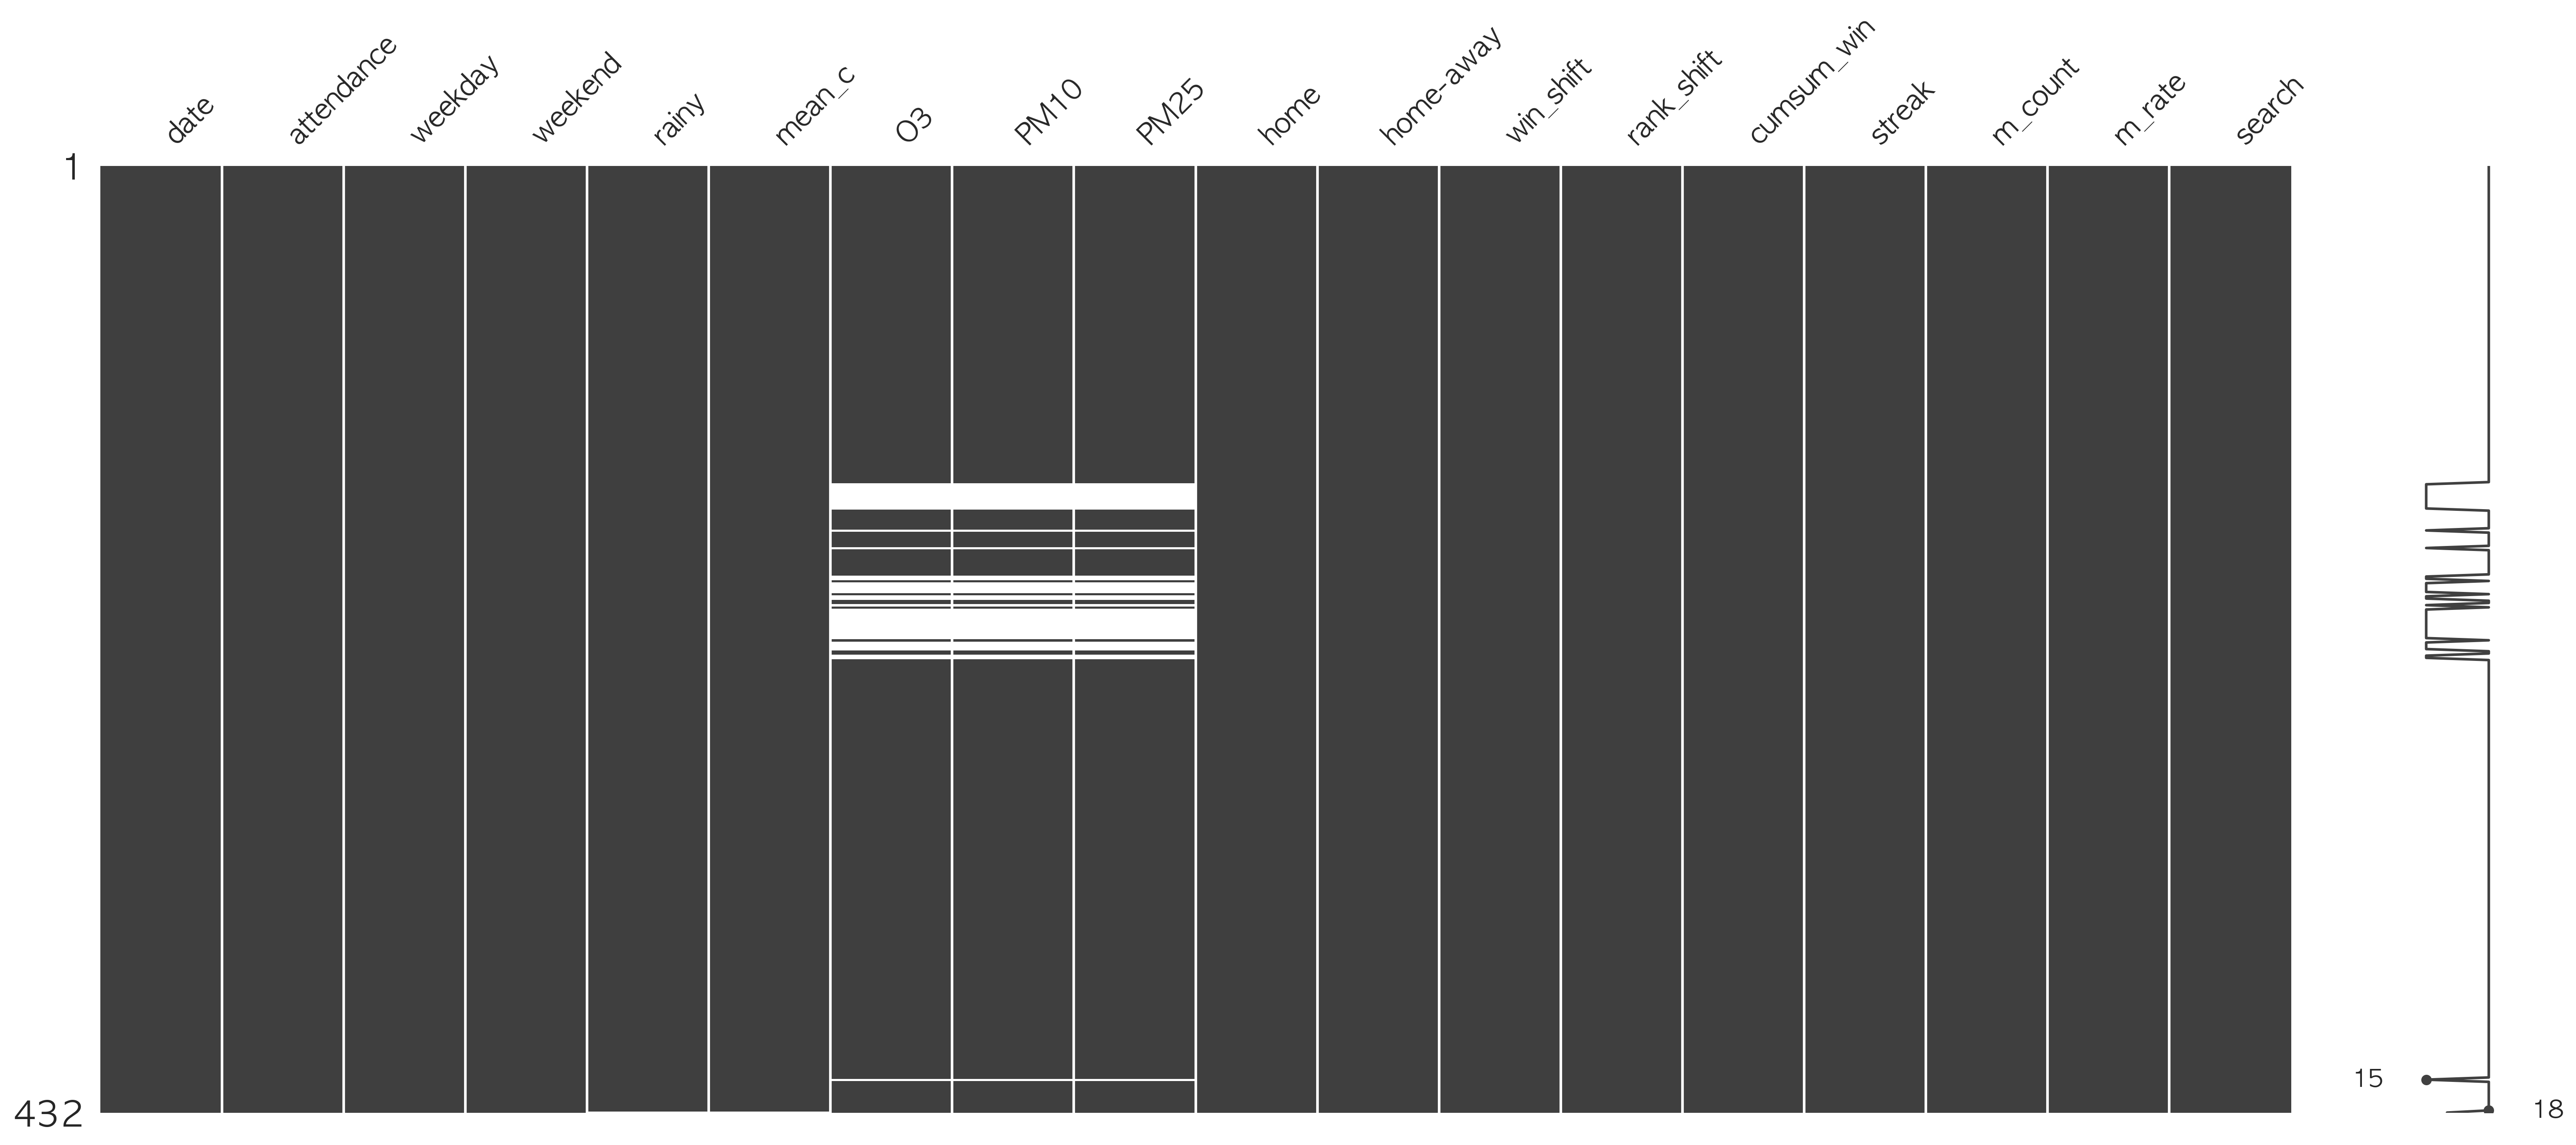

In [18]:
import missingno as msno
msno.matrix(df)
plt.show()

In [19]:
df.columns

Index(['date', 'attendance', 'weekday', 'weekend', 'rainy', 'mean_c', 'O3',
       'PM10', 'PM25', 'home', 'home-away', 'win_shift', 'rank_shift',
       'cumsum_win', 'streak', 'm_count', 'm_rate', 'search'],
      dtype='object')

In [20]:
df["month"] = df["date"].apply(pd.to_datetime).dt.month

In [21]:
df = df[['date', 'month', 'weekday', 'weekend', 'rainy', 'mean_c', 'O3',
       'PM10', 'PM25', 'home', 'home-away', 'win_shift', 'rank_shift',
       'cumsum_win', 'streak', 'm_count', 'm_rate', 'search', 'attendance']]

In [22]:
df

,date,month,weekday,weekend,rainy,mean_c,O3,PM10,PM25,home,home-away,win_shift,rank_shift,cumsum_win,streak,m_count,m_rate,search,attendance
0,2017/03/31,3,Friday,0.0,1.0,8.5,0.021,47.0,27.0,두산,5.0,0,0.0,0,1,1038,0.055877,2.20051,"21,121"
1,2017/04/01,4,Saturday,1.0,1.0,10.0,0.033,22.0,14.0,두산,0.0,1,1.0,1,-1,2001,0.077461,5.29584,"20,636"
2,2017/04/02,4,Sunday,1.0,0.0,9.5,0.037,50.0,30.0,두산,3.0,0,4.0,1,1,1864,0.118562,6.05390,"22,457"
3,2017/04/04,4,Tuesday,0.0,0.0,14.5,0.033,78.0,37.0,LG,6.0,0,0.0,0,1,1297,0.205860,63.69426,"16,411"
4,2017/04/06,4,Thursday,0.0,1.0,10.5,0.028,26.0,15.0,LG,7.0,1,1.0,1,2,1369,0.199416,63.05732,"12,166"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
427,2019/09/24,9,Tuesday,0.0,0.0,20.5,0.016,24.0,12.0,LG,4.0,0,4.0,40,-2,1242,0.186795,16.56050,"15,115"
428,2019/09/27,9,Friday,0.0,0.0,23.5,0.011,23.0,11.0,LG,1.0,0,4.0,40,-3,695,0.283453,29.29936,"19,523"
429,2019/09/29,9,Sunday,1.0,0.0,23.5,0.031,34.0,23.0,LG,3.0,0,4.0,40,-4,970,0.365979,26.75159,"25,000"
430,2019/09/30,9,Monday,0.0,0.0,23.0,0.032,46.0,33.0,LG,6.0,0,4.0,40,1,818,0.238386,36.30573,"12,042"


In [23]:
df =df.fillna(method="ffill")

In [25]:
df.to_csv("datas/master_table.csv", index=False)